# Edible Mushroom Discriminator

Analysis by Aaron Hinck

## Problem Description

Given a set of data about mushrooms, can we determine, with a high degree of certainty, whether or not a given mushroom is edible?

Given that the cost of a false positive is great (i.e. death), we want to measure precision and not accuracy.

## Dataset
NOTE: Taken from https://archive.ics.uci.edu/dataset/73/mushroom


<table><caption>Variables Table</caption>
<tr><th>Variable Name</th><th>Role</th><th>Type</th><th>Description</th><th>Units</th><th>Missing Values</th></tr>
<tr><td>is_edible</td><td>Target</td><td>Categorical</td><td>edible,poisonous</td><td></td><td>no</td></tr>
<tr><td>cap-shape</td><td>Feature</td><td>Categorical</td><td>bell,conical,convex,flat, knobbed,sunken</td><td></td><td>no</td></tr>
<tr><td>cap-surface</td><td>Feature</td><td>Categorical</td><td>fibrous,grooves,scaly,smooth</td><td></td><td>no</td></tr>
<tr><td>cap-color</td><td>Feature</td><td>Binary</td><td>brown,buff,cinnamon,gray,green, pink,purple,red,white,yellow</td><td></td><td>no</td></tr>
<tr><td>bruises</td><td>Feature</td><td>Categorical</td><td>bruises,no</td><td></td><td>no</td></tr>
<tr><td>odor</td><td>Feature</td><td>Categorical</td><td>almond,anise,creosote,fishy,foul, musty,none,pungent,spicy</td><td></td><td>no</td></tr>
<tr><td>gill-attachment</td><td>Feature</td><td>Categorical</td><td>attached,descending,free,notched</td><td></td><td>no</td></tr>
<tr><td>gill-spacing</td><td>Feature</td><td>Categorical</td><td>close,crowded,distant</td><td></td><td>no</td></tr>
<tr><td>gill-size</td><td>Feature</td><td>Categorical</td><td>broad,narrow</td><td></td><td>no</td></tr>
<tr><td>gill-color</td><td>Feature</td><td>Categorical</td><td>black,brown,buff,chocolate,gray, green,orange,pink,purple,red, white,yellow</td><td></td><td>no</td></tr>
<tr><td>stalk-shape</td><td>Feature</td><td>Categorical</td><td>enlarging,tapering</td><td></td><td>no</td></tr>
<tr><td>stalk-root</td><td>Feature</td><td>Categorical</td><td>bulbous,club,cup,equal, rhizomorphs,rooted,missing</td><td></td><td>yes</td></tr>
<tr><td>stalk-surface-above-ring</td><td>Feature</td><td>Categorical</td><td>fibrous,scaly,silky,smooth</td><td></td><td>no</td></tr>
<tr><td>stalk-surface-below-ring</td><td>Feature</td><td>Categorical</td><td>fibrous,scaly,silky,smooth</td><td></td><td>no</td></tr>
<tr><td>stalk-color-above-ring</td><td>Feature</td><td>Categorical</td><td>brown,buff,cinnamon,gray,orange, pink,red,white,yellow</td><td></td><td>no</td></tr>
<tr><td>stalk-color-below-ring</td><td>Feature</td><td>Categorical</td><td>brown,buff,cinnamon,gray,orange, pink,red,white,yellow</td><td></td><td>no</td></tr>
<tr><td>veil-type</td><td>Feature</td><td>Binary</td><td>partial,universal</td><td></td><td>no</td></tr>
<tr><td>veil-color</td><td>Feature</td><td>Categorical</td><td>brown,orange,white,yellow</td><td></td><td>no</td></tr>
<tr><td>ring-number</td><td>Feature</td><td>Categorical</td><td>none,one,two</td><td></td><td>no</td></tr>
<tr><td>ring-type</td><td>Feature</td><td>Categorical</td><td>cobwebby,evanescent,flaring,large, none,pendant,sheathing,zone</td><td></td><td>no</td></tr>
<tr><td>spore-print-color</td><td>Feature</td><td>Categorical</td><td>black,brown,buff,chocolate,green, orange,purple,white,yellow</td><td></td><td>no</td></tr>
<tr><td>population</td><td>Feature</td><td>Categorical</td><td>abundant,clustered,numerous, scattered,several,solitary</td><td></td><td>no</td></tr>
<tr><td>habitat</td><td>Feature</td><td>Categorical</td><td>grasses,leaves,meadows,paths, urban,waste,woods</td><td></td><td>no</td></tr>
</table>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.decomposition import PCA
#from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift
#from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings(action='ignore',category=DeprecationWarning)
warnings.filterwarnings(action='ignore',category=FutureWarning)

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn import model_selection

from sklearn import tree
import statsmodels.api as sm 

rnd_state=13

In [2]:
df = pd.read_csv("mushroom.csv")

In [3]:
df.head()

is_edible cap-shape cap-surface cap-color bruises?    odor gill-attachment  \
0    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
1    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
2    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
3    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   
4    EDIBLE    CONVEX      SMOOTH     WHITE  BRUISES  ALMOND            FREE   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0      CROWDED    NARROW      WHITE  ...                   SMOOTH   
1      CROWDED    NARROW      WHITE  ...                   SMOOTH   
2      CROWDED    NARROW       PINK  ...                   SMOOTH   
3      CROWDED    NARROW       PINK  ...                   SMOOTH   
4      CROWDED    NARROW      BROWN  ...                   SMOOTH   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                  WHITE                  WHITE   PARTIAL      WHITE   
1                  WHITE                  WHITE   PARTIAL      WHITE   
2                  WHITE                  WHITE   PARTIAL      WHITE   
3                  WHITE                  WHITE   PARTIAL      WHITE   
4                  WHITE                  WHITE   PARTIAL      WHITE   

  ring-number ring-type spore-print-color population habitat  
0         ONE   PENDANT            PURPLE    SEVERAL   WOODS  
1         ONE   PENDANT             BROWN    SEVERAL   WOODS  
2         ONE   PENDANT            PURPLE    SEVERAL   WOODS  
3         ONE   PENDANT             BROWN    SEVERAL   WOODS  
4         ONE   PENDANT            PURPLE    SEVERAL   WOODS  

[5 rows x 23 columns]

In [4]:
df.shape

(8416, 23)

In [5]:
df.dtypes

is_edible                   object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [6]:
print(df.apply(lambda col: col.unique()))

is_edible                                                 [EDIBLE, POISONOUS]
cap-shape                      [CONVEX, FLAT, BELL, SUNKEN, KNOBBED, CONICAL]
cap-surface                                 [SMOOTH, FIBROUS, SCALY, GROOVES]
cap-color                   [WHITE, YELLOW, BROWN, GRAY, RED, PINK, PURPLE...
bruises?                                                        [BRUISES, NO]
odor                        [ALMOND, ANISE, NONE, PUNGENT, CREOSOTE, FOUL,...
gill-attachment                                              [FREE, ATTACHED]
gill-spacing                                                 [CROWDED, CLOSE]
gill-size                                                     [NARROW, BROAD]
gill-color                  [WHITE, PINK, BROWN, GRAY, BLACK, CHOCOLATE, P...
stalk-shape                                             [TAPERING, ENLARGING]
stalk-root                                  [BULBOUS, CLUB, ROOTED, EQUAL, ?]
stalk-surface-above-ring                      [SMOOTH, FIBROUS, 

In [7]:
df['stalk-root'].value_counts()

stalk-root
BULBOUS    3800
?          2480
EQUAL      1376
CLUB        568
ROOTED      192
Name: count, dtype: int64

One-hot encode all of the categorical features, to make it easier for the system to categorize the mushrooms.

In [8]:
df2 = pd.get_dummies(df, dtype=int)

In [9]:
df2.dtypes

is_edible_EDIBLE       int32
is_edible_POISONOUS    int32
cap-shape_BELL         int32
cap-shape_CONICAL      int32
cap-shape_CONVEX       int32
                       ...  
habitat_MEADOWS        int32
habitat_PATHS          int32
habitat_URBAN          int32
habitat_WASTE          int32
habitat_WOODS          int32
Length: 119, dtype: object

Drop all of our original columns (dtype=object), and drop is_edible_POISONOUS and rename is_edible_EDIBLE to is_edible

In [10]:
df3 = df2.drop(columns=['is_edible_POISONOUS']).select_dtypes(exclude=[object]).copy()
df3.rename(columns={"is_edible_EDIBLE": "is_edible"},inplace=True)

In [11]:
df3.dtypes

is_edible            int32
cap-shape_BELL       int32
cap-shape_CONICAL    int32
cap-shape_CONVEX     int32
cap-shape_FLAT       int32
                     ...  
habitat_MEADOWS      int32
habitat_PATHS        int32
habitat_URBAN        int32
habitat_WASTE        int32
habitat_WOODS        int32
Length: 118, dtype: object

## Determine Feature Correlation
We do this to be able to eliminate features that basically convey redundant information.

<Axes: >

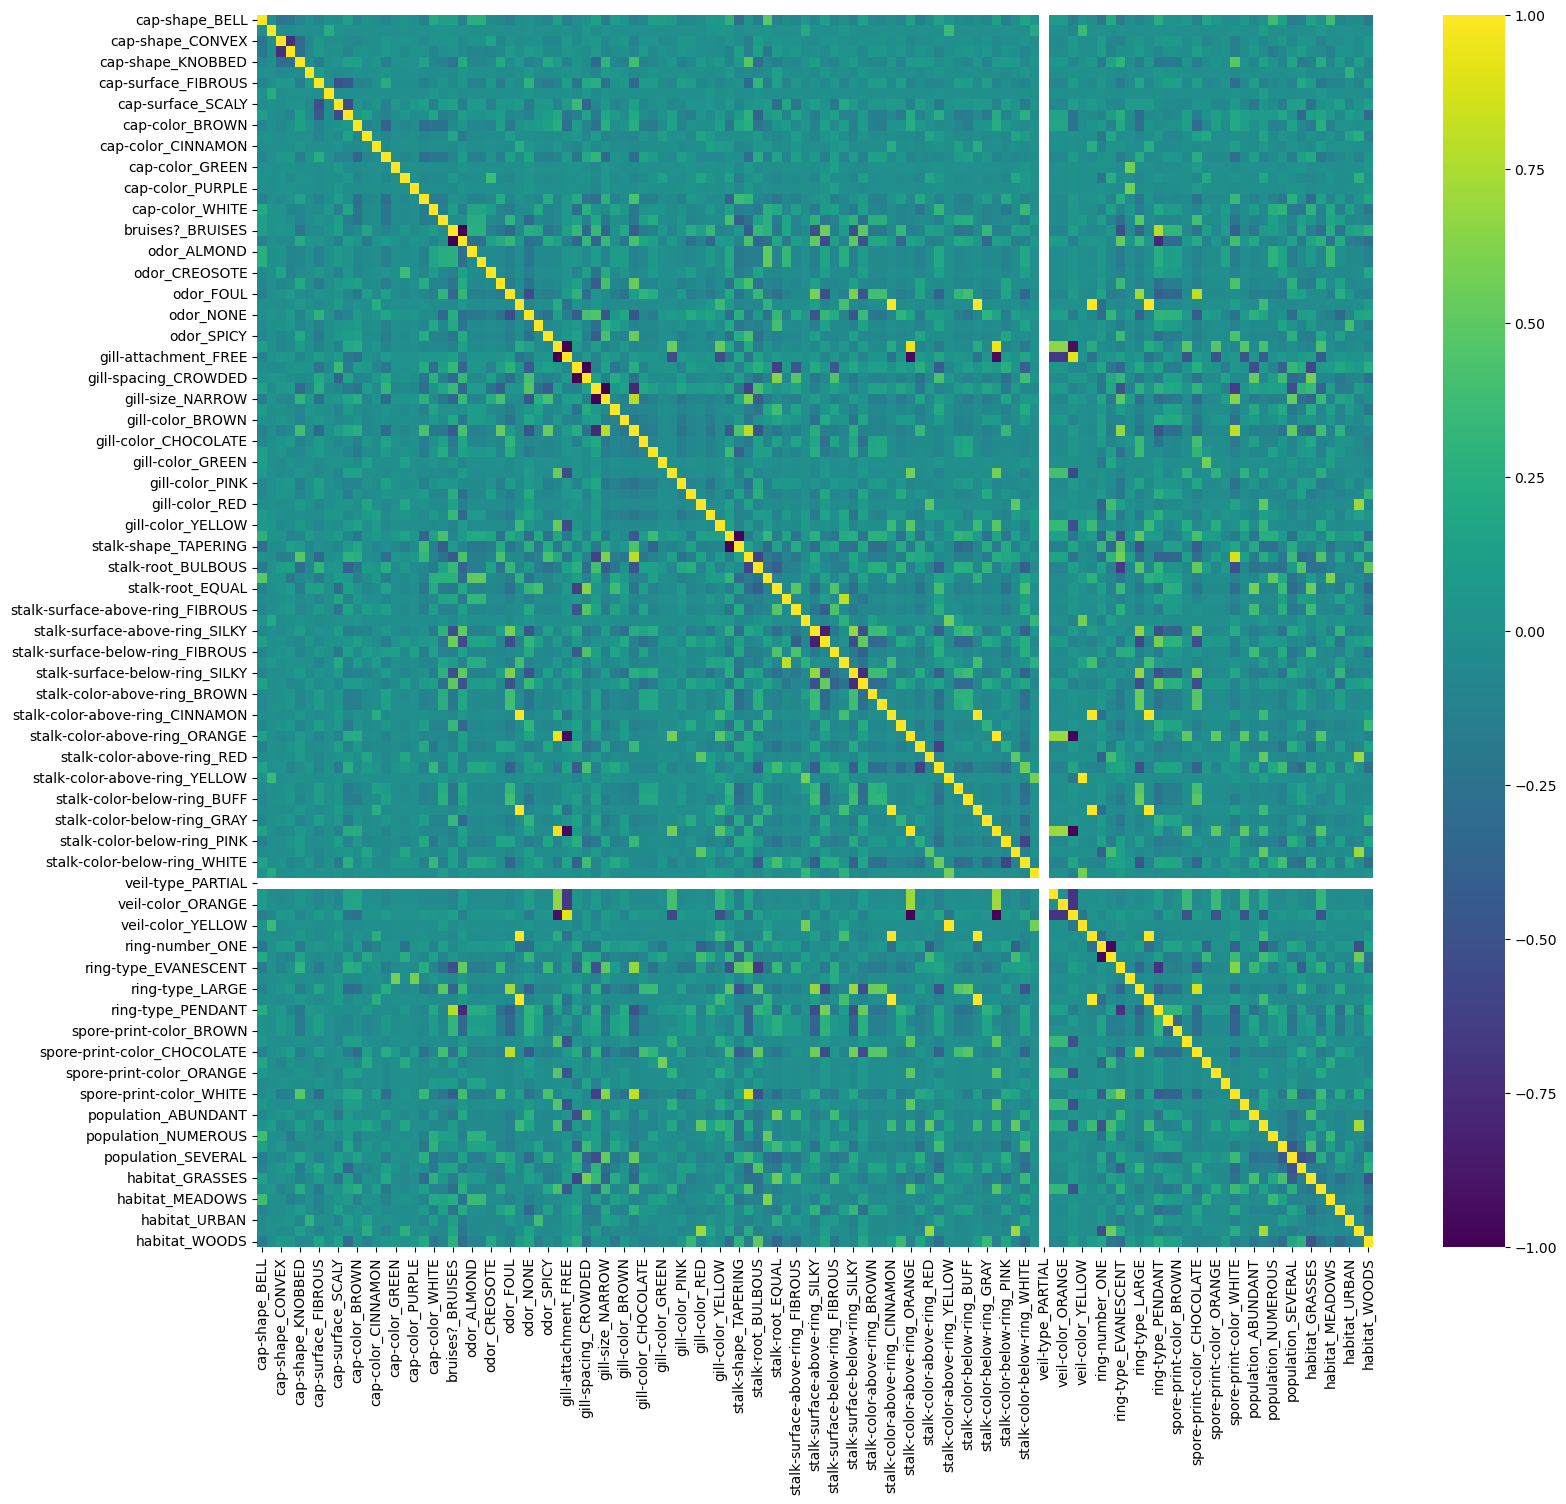

In [12]:
df_corr = df3.drop(columns=['is_edible']).corr()
plt.figure(figsize=(18,16))
sns.heatmap(df_corr,cmap='viridis')

In [13]:
val_counts = {}
for c in range(4,11):
    val_counts[c] = 0    
    
for num in range(df_corr.shape[0]):
    for j in range(4,11):
        val_counts[j] = val_counts[j] + int((abs(df_corr.iloc[num,num+1:])).ge(j/10).sum())
    
    if not num % 10:
        print("%d..."%(num), end="")

print("Done!")
        
# convert the totals to be just the specific range, not cumulative
adj_val_counts = dict()
for c in range(4,10):
    adj_val_counts[c] = val_counts[c] - val_counts[c+1]

0...10...20...30...40...50...60...70...80...90...100...110...Done!


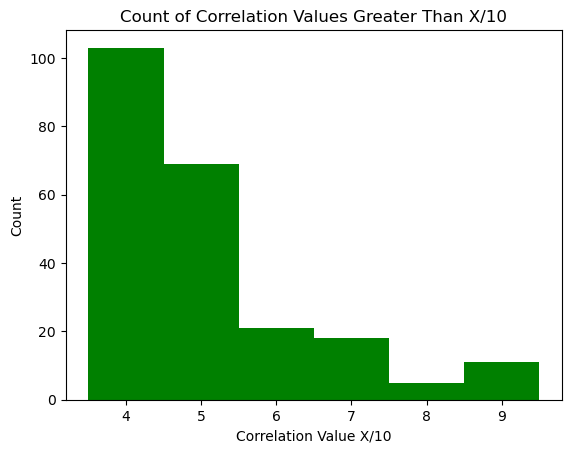

In [14]:
# plot the results
plt.title('Count of Correlation Values Greater Than X/10')
plt.xlabel('Correlation Value X/10')
plt.ylabel('Count')
plt.bar(adj_val_counts.keys(),adj_val_counts.values(),1,color='g')
plt.show()

For each pair of features that have an absolute correlation value of .6 or more, get rid of one of them.

In [15]:
def get_uncorrelated_columns(src_df, corr_df, threshold):

    starting_columns = src_df.drop(columns=['is_edible']).columns
    uncorrelated_columns = list(starting_columns)

    # step through the half of the correlation chart that lies to the right of the 1.0's diagonal
    for num in range(corr_df.shape[0]):
        if ((abs(corr_df.iloc[num,num+1:])>threshold).sum()>0.1):
            uncorrelated_columns.remove(starting_columns[num])
        if not num % 10:
            print("%d..."%(num), end="")
    print("Done!")
    print( "Starting features %d, Uncorrelated features %d" % (len(starting_columns),len(uncorrelated_columns)) )
    return uncorrelated_columns

In [16]:
uncorrelated_columns = get_uncorrelated_columns(df3, df_corr, .6)
#uncorrelated_columns = get_uncorrelated_columns(df3, df_corr, .5)

print(uncorrelated_columns)

0...10...20...30...40...50...60...70...80...90...100...110...Done!
Starting features 117, Uncorrelated features 82
['cap-shape_BELL', 'cap-shape_CONICAL', 'cap-shape_FLAT', 'cap-shape_KNOBBED', 'cap-shape_SUNKEN', 'cap-surface_FIBROUS', 'cap-surface_GROOVES', 'cap-surface_SCALY', 'cap-surface_SMOOTH', 'cap-color_BROWN', 'cap-color_BUFF', 'cap-color_CINNAMON', 'cap-color_GRAY', 'cap-color_GREEN', 'cap-color_PINK', 'cap-color_PURPLE', 'cap-color_RED', 'cap-color_WHITE', 'cap-color_YELLOW', 'odor_ALMOND', 'odor_ANISE', 'odor_CREOSOTE', 'odor_FISHY', 'odor_NONE', 'odor_PUNGENT', 'odor_SPICY', 'gill-color_BLACK', 'gill-color_BROWN', 'gill-color_CHOCOLATE', 'gill-color_GRAY', 'gill-color_GREEN', 'gill-color_ORANGE', 'gill-color_PINK', 'gill-color_PURPLE', 'gill-color_WHITE', 'gill-color_YELLOW', 'stalk-shape_TAPERING', 'stalk-root_EQUAL', 'stalk-surface-above-ring_FIBROUS', 'stalk-surface-above-ring_SCALY', 'stalk-surface-above-ring_SMOOTH', 'stalk-surface-below-ring_FIBROUS', 'stalk-surface

Create the training/test sets

In [17]:
f0 = df3[uncorrelated_columns]
y0 = df3['is_edible']

X0_train, X0_test, y0_train, y0_test = train_test_split(f0,y0, test_size=0.2, random_state=rnd_state)

## Backward Elimination

In [18]:

def backwardElimination(regressor, df_X, y, min_p_cutoff):

    assert df_X.shape[0] == np.shape(y)[0], 'Length of df_X and y do not match'
    assert min_p_cutoff > 0, 'Minimum P value to eliminate must be positive'
    
    max_p = 1        # Initializing with random value of maximum P value
    
    X_new = df_X.copy()
    
    while max_p >= min_p_cutoff:

        current_columns = list(X_new.columns)

        p_values = list(regressor.pvalues)
        
        max_p = max(p_values)
        max_p_idx = p_values.index(max_p)
        
#        if max_p_idx == 0:
            
#            temp_p = set(p_values)
            
            # removing the largest element from temp list
#            temp_p.remove(max(temp_p))
            
#            max_p = max(temp_p)
#            max_p_idx = p_values.index(max_p)
            
#            if max_p < min_p_cutoff:
#                print('Final Max P value is %f. Finished removing features!'%(max_p))
#                break
                
        if max_p < min_p_cutoff:
            print('Final Max P value is %f. Finished removing features!'%(max_p))
            break
        
        curr_col = current_columns[max_p_idx]

        print("Removing unimportant column '{}' with P-Value {}".
              format(curr_col, np.round(np.array(p_values)[max_p_idx], decimals= 4)))
        
        X_new = X_new.drop(columns=[curr_col], axis=1)
        
        regressor = sm.OLS(endog = y, exog = X_new).fit()
        
    return sorted(X_new.columns)

In [19]:
# Fitting the regressor
regressor_SLR_OLS = sm.OLS(endog = y0_train, exog = X0_train).fit()

# Looking at the summary of regressor
#print(regressor_SLR_OLS.summary())

remaining_features = backwardElimination(regressor=regressor_SLR_OLS,
                                         df_X=X0_train, y=y0_train, min_p_cutoff = 0.05)
print("%d features remaining"%(len(remaining_features)))

Removing unimportant column 'gill-color_ORANGE' with P-Value 0.9949
Removing unimportant column 'gill-color_PURPLE' with P-Value 0.9991
Removing unimportant column 'stalk-color-below-ring_WHITE' with P-Value 0.9975
Removing unimportant column 'cap-surface_GROOVES' with P-Value 0.9598
Removing unimportant column 'veil-color_YELLOW' with P-Value 0.9559
Removing unimportant column 'cap-color_YELLOW' with P-Value 0.9109
Removing unimportant column 'gill-color_WHITE' with P-Value 0.9017
Removing unimportant column 'stalk-color-below-ring_GRAY' with P-Value 0.8974
Removing unimportant column 'gill-color_YELLOW' with P-Value 0.8856
Removing unimportant column 'cap-color_PURPLE' with P-Value 0.8322
Removing unimportant column 'cap-color_GREEN' with P-Value 0.8871
Removing unimportant column 'gill-color_BROWN' with P-Value 0.8335
Removing unimportant column 'gill-color_CHOCOLATE' with P-Value 0.8037
Removing unimportant column 'gill-color_GREEN' with P-Value 0.7811
Removing unimportant column '

In [20]:
f0 = df3[remaining_features]
y0 = df3['is_edible']

X0_train, X0_test, y0_train, y0_test = train_test_split(f0,y0, test_size=0.2, random_state=rnd_state)

In [21]:
f0.head()

cap-color_BROWN  cap-color_BUFF  cap-color_CINNAMON  cap-color_GRAY  \
0                0               0                   0               0   
1                0               0                   0               0   
2                0               0                   0               0   
3                0               0                   0               0   
4                0               0                   0               0   

   cap-color_PINK  cap-color_RED  cap-shape_BELL  cap-shape_CONICAL  \
0               0              0               0                  0   
1               0              0               0                  0   
2               0              0               0                  0   
3               0              0               0                  0   
4               0              0               0                  0   

   cap-surface_FIBROUS  cap-surface_SCALY  ...  spore-print-color_YELLOW  \
0                    0                  0  ...                         0   
1                    0                  0  ...                         0   
2                    0                  0  ...                         0   
3                    0                  0  ...                         0   
4                    0                  0  ...                         0   

   stalk-color-below-ring_BROWN  stalk-color-below-ring_YELLOW  \
0                             0                              0   
1                             0                              0   
2                             0                              0   
3                             0                              0   
4                             0                              0   

   stalk-root_EQUAL  stalk-shape_TAPERING  stalk-surface-above-ring_FIBROUS  \
0                 0                     1                                 0   
1                 0                     1                                 0   
2                 0                     1                                 0   
3                 0                     1                                 0   
4                 0                     1                                 0   

   stalk-surface-above-ring_SCALY  stalk-surface-above-ring_SMOOTH  \
0                               0                                1   
1                               0                                1   
2                               0                                1   
3                               0                                1   
4                               0                                1   

   stalk-surface-below-ring_FIBROUS  stalk-surface-below-ring_SCALY  
0                                 0                               0  
1                                 0                               0  
2                                 0                               0  
3                                 0                               0  
4                                 0                               0  

[5 rows x 51 columns]

In [22]:
def test_model(X_train, X_test, y_train, y_test, model_class, param, m_range, model_name, target_name,
               test_name, run_kfold_test, additional_params=None, debug=False):
    
    print("%s %s testing for %s"%(model_name, test_name, target_name))
    best_num=0
    best_test_prec=0
    best_train_prec=0
    best_yhat=0
    best_model=None
    test_score=[]
    train_score=[]
    
    for num in m_range:

        end_char = "\n"

        if debug:
            print( "Testing %s"%(num))
        params = {'random_state':rnd_state, param: num }
        if additional_params:
            params.update(additional_params)

        # create the model with the given parameters
        test_model = model_class(**params)
        if debug:
            print( "Done creating test model")
        test_model.fit(X_train, y_train)
        if debug:
            print( "Done fitting test model")
        y_hat_test = test_model.predict(X_test)
        if debug:
            print( "Done y_hat_test")
        y_hat_train = test_model.predict(X_train)
        if debug:
            print( "Done y_hat_train")        
        # print out the precision
        test_precision = metrics.precision_score(y_test, y_hat_test)
        train_precision = metrics.precision_score(y_train, y_hat_train)
        test_score.append(test_precision)
        train_score.append(train_precision)
        
        if test_precision > best_test_prec:
            best_test_prec = test_precision
            best_train_prec = train_precision
            best_num = num
            best_yhat=y_hat_test
            best_model = test_model
        else:
            end_char=""

        if isinstance(best_num, int):
            print("\r   %s: %d - Precision score - Test: %f   Train: %f"%
                  (param, num, test_precision, train_precision), end=end_char)
        elif isinstance(best_num, float):
            print("\r   %s: %f - Precision score - Test: %f   Train: %f"%
                  (param, num, test_precision, train_precision), end=end_char)
        else:
            print("\r   %s: %s - Precision score - Test: %f   Train: %f"%
                  (param, num, test_precision, train_precision), end=end_char)

    if isinstance(best_num, int):
        print("\rBest %s: %d (of %d values)- Precision score - Test: %f   Train: %f"%
              (test_name,best_num, len(m_range), best_test_prec, best_train_prec))
    elif isinstance(best_num, float):
        print("\rBest %s: %f (of %d values)- Precision score - Test: %f   Train: %f"%
              (test_name,best_num, len(m_range), best_test_prec, best_train_prec))
    else:
        print("\rBest %s: %s (of %d values)- Precision score - Test: %f   Train: %f"%
              (test_name,best_num, len(m_range), best_test_prec, best_train_prec))

    
    # for cross-validation, use KFold, and check the results
    if run_kfold_test:
        kmean = kfold_cross_validation(best_model, X_train, y_train)
        print("KFold results:",kmean)

    fig, ax = plt.subplots()
    plt.xlabel('%s Value'%(test_name))
    plt.ylabel('Precision')
    ax.plot(m_range,test_score,label="Test Precision")
    ax.plot(m_range,train_score,label="Train Precision")
    ax.legend()
    plt.show()

    plot_confusion_matrix(y_test, best_yhat, model_name, target_name) 

    return best_model


def kfold_cross_validation(test_model, X, y):
    kfold = model_selection.KFold(n_splits=10, random_state=rnd_state, shuffle=True)
    results = model_selection.cross_val_score(test_model, X, y, cv=kfold)
    return results.mean()


def plot_confusion_matrix(test_values, yhat_values, model_name, target_name):
    
    # generate the confusion matrices
    cm = metrics.confusion_matrix(test_values, yhat_values) 
    
    disp = metrics.ConfusionMatrixDisplay(cm)
    disp.plot(values_format='')
    disp.ax_.set_title('Target %s'%(target_name))
    disp.im_.colorbar.remove()

    plt.show()
    

def plot_multilabel_confusion_matrix(test_values, yhat_values, model_name, fig_num):
    
    # generate the confusion matrices
    cm = metrics.multilabel_confusion_matrix(test_values, yhat_values) 
    f, ax = plt.subplots(1, 2, figsize=(5, 4))
    axes = ax.ravel()
    
    # arrange the confusion matrices
    for i in range(len(cm)):
        disp = metrics.ConfusionMatrixDisplay(cm[i])
        disp.plot(ax=axes[i], values_format='') #  values_format='.4g'
        disp.ax_.set_title('class %d'%(i))
        disp.im_.colorbar.remove()

    # display the confusion matrix
    plt.subplots_adjust(wspace=0.2, hspace=0.2)
    plt.show()

DecisionTreeClassifier Depth testing for is_edible
   max_depth: 1 - Precision score - Test: 0.970091   Train: 0.968082
   max_depth: 2 - Precision score - Test: 0.983254   Train: 0.979017
   max_depth: 3 - Precision score - Test: 0.991276   Train: 0.989997
   max_depth: 4 - Precision score - Test: 0.991295   Train: 0.990036
   max_depth: 5 - Precision score - Test: 0.992375   Train: 0.993611
   max_depth: 8 - Precision score - Test: 0.994541   Train: 0.995824
   max_depth: 9 - Precision score - Test: 0.998904   Train: 0.998047
Best Depth: 9 (of 49 values)- Precision score - Test: 0.998904   Train: 0.998047
KFold results: 0.9986633656818092


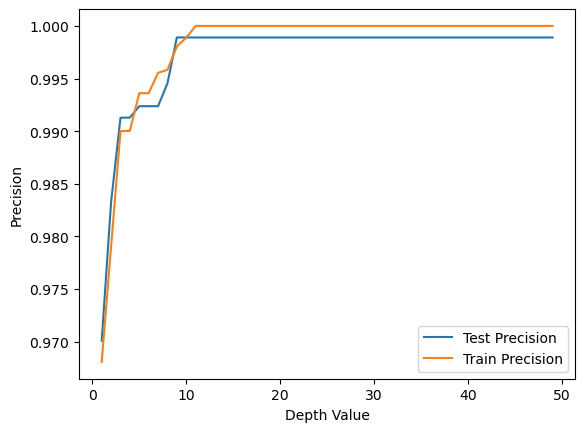

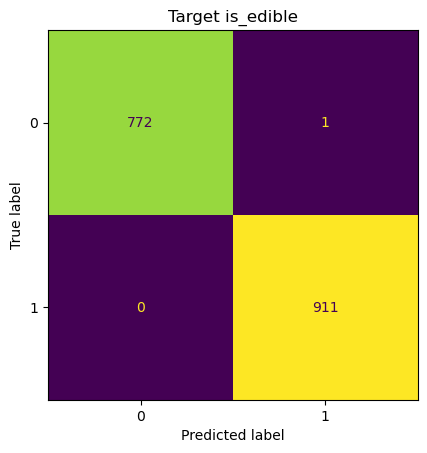

In [23]:
model = test_model(X0_train, X0_test, y0_train, y0_test, DecisionTreeClassifier,
                   "max_depth", range(1,50), "DecisionTreeClassifier", "is_edible", "Depth", True)

In [24]:
text_representation = tree.export_text(model, class_names=['Poisonous','Edible'],
                                       feature_names=df3[remaining_features].columns)
print(text_representation)

|--- odor_NONE <= 0.50
|   |--- odor_ANISE <= 0.50
|   |   |--- odor_ALMOND <= 0.50
|   |   |   |--- class: Poisonous
|   |   |--- odor_ALMOND >  0.50
|   |   |   |--- class: Edible
|   |--- odor_ANISE >  0.50
|   |   |--- class: Edible
|--- odor_NONE >  0.50
|   |--- habitat_MEADOWS <= 0.50
|   |   |--- stalk-surface-below-ring_SCALY <= 0.50
|   |   |   |--- cap-color_BUFF <= 0.50
|   |   |   |   |--- cap-shape_CONICAL <= 0.50
|   |   |   |   |   |--- cap-shape_BELL <= 0.50
|   |   |   |   |   |   |--- stalk-shape_TAPERING <= 0.50
|   |   |   |   |   |   |   |--- habitat_GRASSES <= 0.50
|   |   |   |   |   |   |   |   |--- habitat_LEAVES <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Edible
|   |   |   |   |   |   |   |   |--- habitat_LEAVES >  0.50
|   |   |   |   |   |   |   |   |   |--- class: Edible
|   |   |   |   |   |   |   |--- habitat_GRASSES >  0.50
|   |   |   |   |   |   |   |   |--- population_SEVERAL <= 0.50
|   |   |   |   |   |   |   |   |   |--- class: Edible

With only nine levels of decisions, the DecisionTreeClassifier can almost perfectly predict the edibility of mushrooms -- based on the original dataset.

Given that the dataset cannot be guaranteed to be complete, you are still better off only eating what you buy in a grocery store.

In [25]:
def forward_selection(test_df, targets, test_model):
    df_permute = test_df.copy()
    count=0

    X = df_permute #.values
    y = targets.values

    forward_selection_features = {}

    # recalc the train-test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rnd_state)

    y_hat_train = test_model.predict(X_train)
    
    starting_precision = metrics.precision_score(y_train, y_hat_train)
    current_precision = starting_precision

    for col in df_permute.columns:

        # permute the one column in question
        df_permute[col] = np.random.permutation(df_permute[col])
    
        X = df_permute #.values

        # recalc the train-test
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=rnd_state)
        yhat_test = 0

        y_hat_train = test_model.predict(X_train)
        test_precision = metrics.precision_score(y_train, y_hat_train)
    
        if test_precision != starting_precision:
            print("\r%d %s -- new precision: %f                       "%(count, col, test_precision))
            current_precision = test_precision
            forward_selection_features[col]=count
        else:
            print("\r%d %s: precision score: %f"%(count, col, test_precision), end="")
    
        count+=1

        # reset the column
        df_permute[col] = test_df[col]
    
    print("\rFound %d genes by Forward Selection:                  "%(len(forward_selection_features)))
    for key in sorted(forward_selection_features.keys()):
        print("%s   "%(key),end="")
    print("")
    return sorted(list(forward_selection_features.keys()))


## Model Reduction
Given that model, let's see how many features we really need to keep.

In [26]:
important_features = forward_selection(df3[remaining_features], df3['is_edible'], model)

1 cap-color_BUFF -- new precision: 0.997459                       
4 cap-color_PINK -- new precision: 0.997765                       
6 cap-shape_BELL -- new precision: 0.998589                       
7 cap-shape_CONICAL -- new precision: 0.997489                       
9 cap-surface_SCALY -- new precision: 0.998028                       
13 habitat_GRASSES -- new precision: 0.996900                       
15 habitat_MEADOWS -- new precision: 0.994276                       
20 odor_ALMOND -- new precision: 0.956255                       
21 odor_ANISE -- new precision: 0.953909                       
23 odor_NONE -- new precision: 0.595963                       
28 population_SEVERAL -- new precision: 0.998009                       
29 population_SOLITARY -- new precision: 0.995532                       
33 ring-type_PENDANT -- new precision: 0.997200                       
45 stalk-shape_TAPERING -- new precision: 0.996934                       
50 stalk-surface-below-ring_SCALY -- ne

We discover that we need only 15 features.
<ol><li>cap-color_BUFF</li><li>cap-color_PINK</li><li>cap-shape_BELL</li><li>cap-shape_CONICAL</li><li>cap-surface_SCALY</li><li>habitat_GRASSES</li><li>habitat_MEADOWS</li><li>odor_ALMOND</li><li>odor_ANISE</li><li>odor_NONE</li><li>population_SEVERAL</li><li>population_SOLITARY</li><li>ring-type_PENDANT</li><li>stalk-shape_TAPERING</li><li>stalk-surface-below-ring_SCALY</li></ol>

Now we retest the DecisionTreeClassifier with the smaller set of features

In [27]:
f0 = df3[important_features]
y0 = df3['is_edible']

X0_train, X0_test, y0_train, y0_test = train_test_split(f0,y0, test_size=0.2, random_state=rnd_state)

DecisionTreeClassifier Depth testing for is_edible
   max_depth: 1 - Precision score - Test: 0.970091   Train: 0.968082
   max_depth: 2 - Precision score - Test: 0.983254   Train: 0.979017
   max_depth: 3 - Precision score - Test: 0.991276   Train: 0.989997
   max_depth: 4 - Precision score - Test: 0.991295   Train: 0.990036
   max_depth: 5 - Precision score - Test: 0.992375   Train: 0.993611
   max_depth: 8 - Precision score - Test: 0.994541   Train: 0.995824
   max_depth: 9 - Precision score - Test: 0.998904   Train: 0.998047
Best Depth: 9 (of 49 values)- Precision score - Test: 0.998904   Train: 0.998047
KFold results: 0.9985152181868686


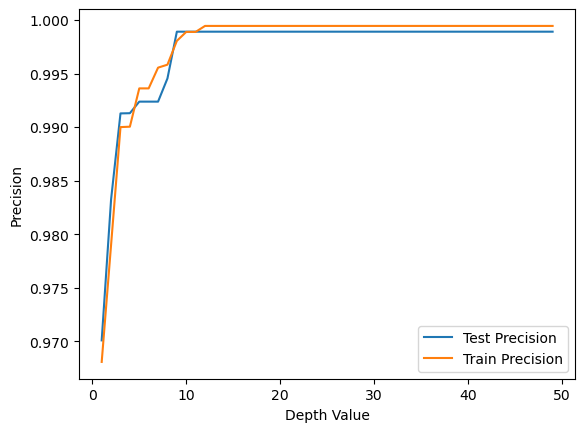

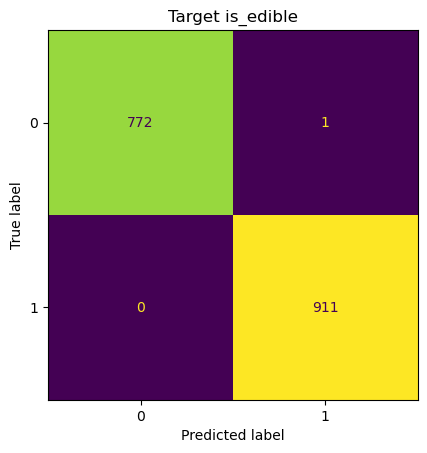

In [28]:
model2 = test_model(X0_train, X0_test, y0_train, y0_test, DecisionTreeClassifier,
                    "max_depth", range(1,50), "DecisionTreeClassifier", "is_edible", "Depth", True)

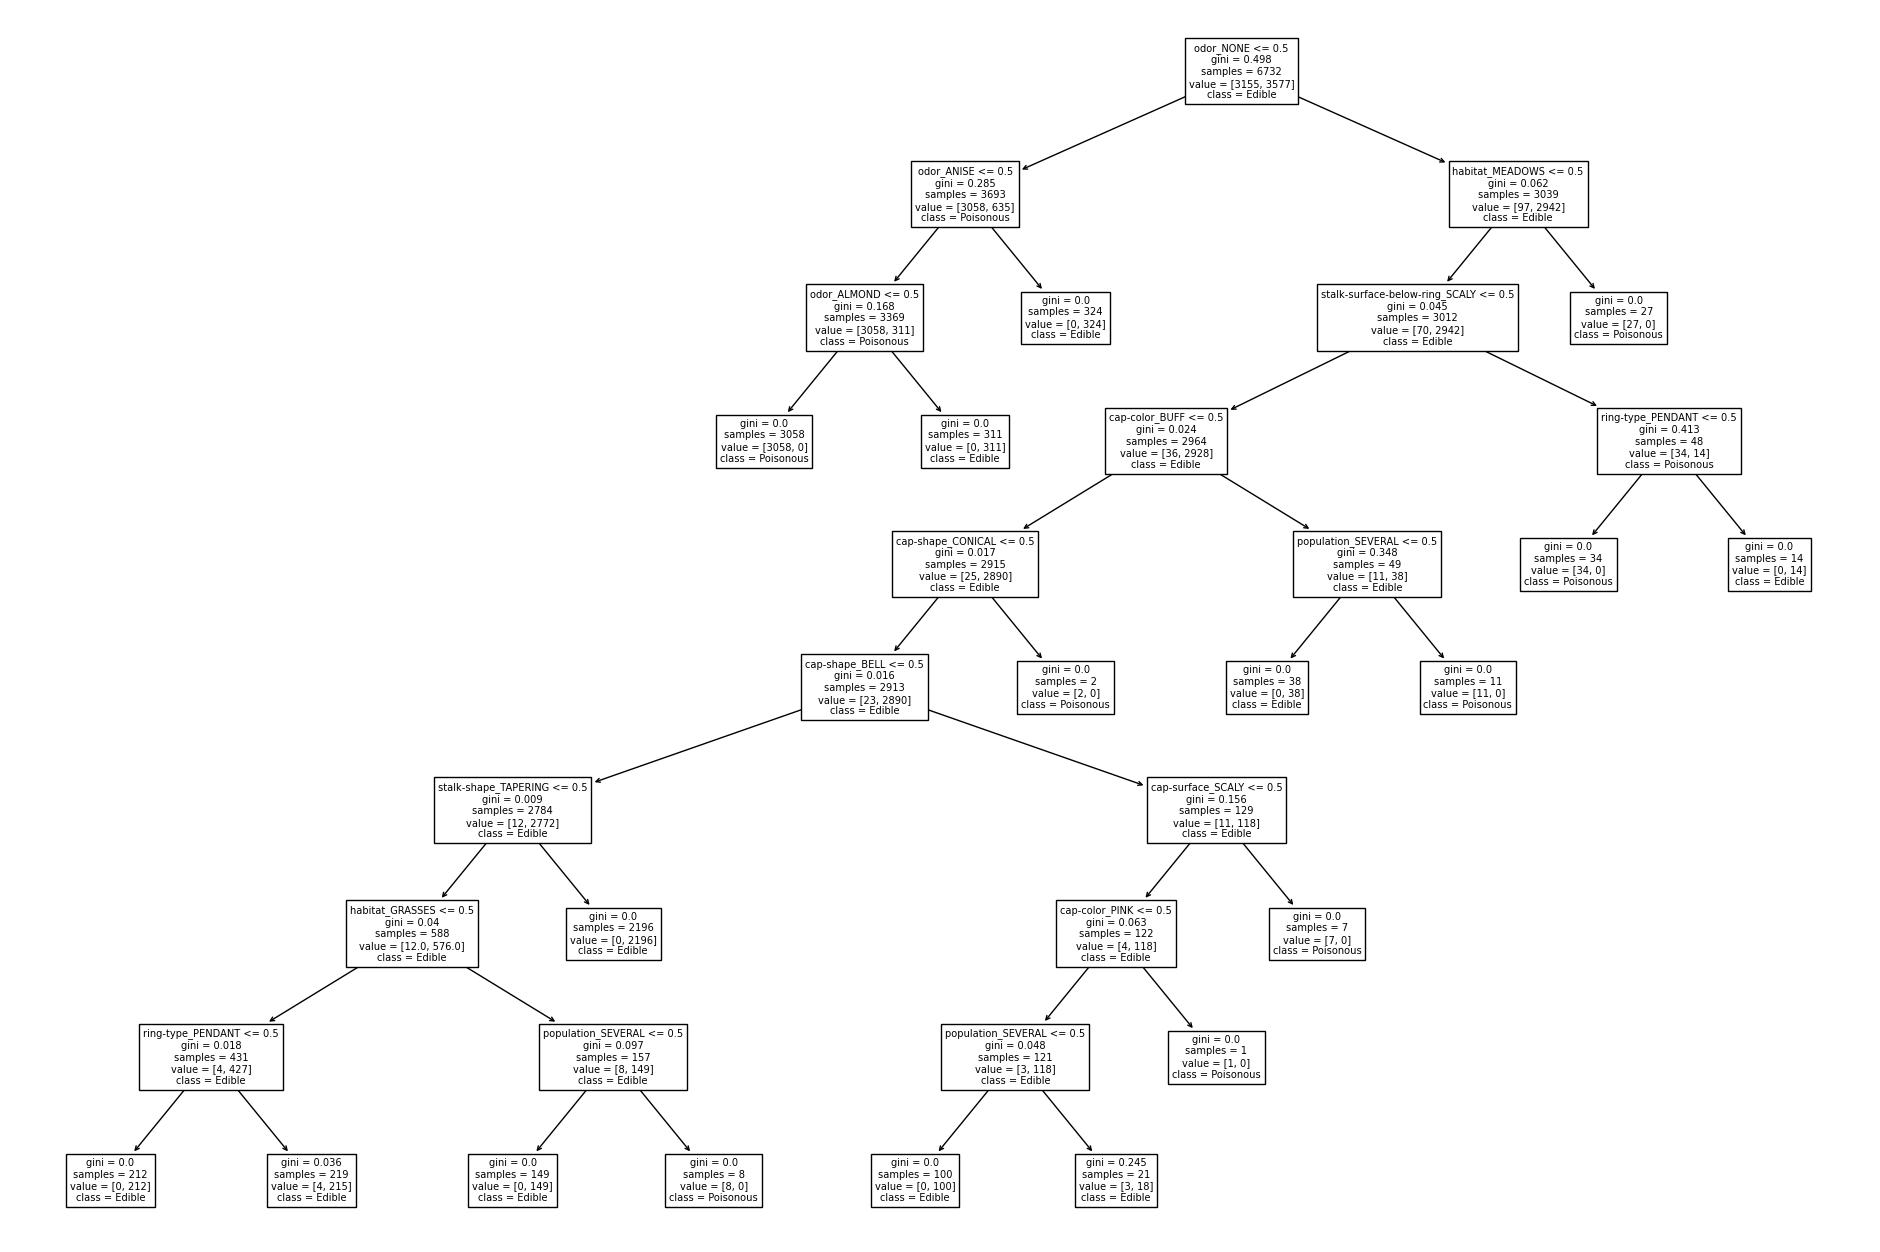

In [29]:
plt.figure(figsize=(24,16))
output = tree.plot_tree(model2, class_names=['Poisonous','Edible'],feature_names=list(df3[important_features].columns))

## Conclusion
With a small set of 15 features, we can classify whether or not a mushroom is edible 99.9% of the time.

## Addendum: Is it possible to identify edible mushrooms WITHOUT using odor?
We need to repeat the entire process without any odor features.

<Axes: >

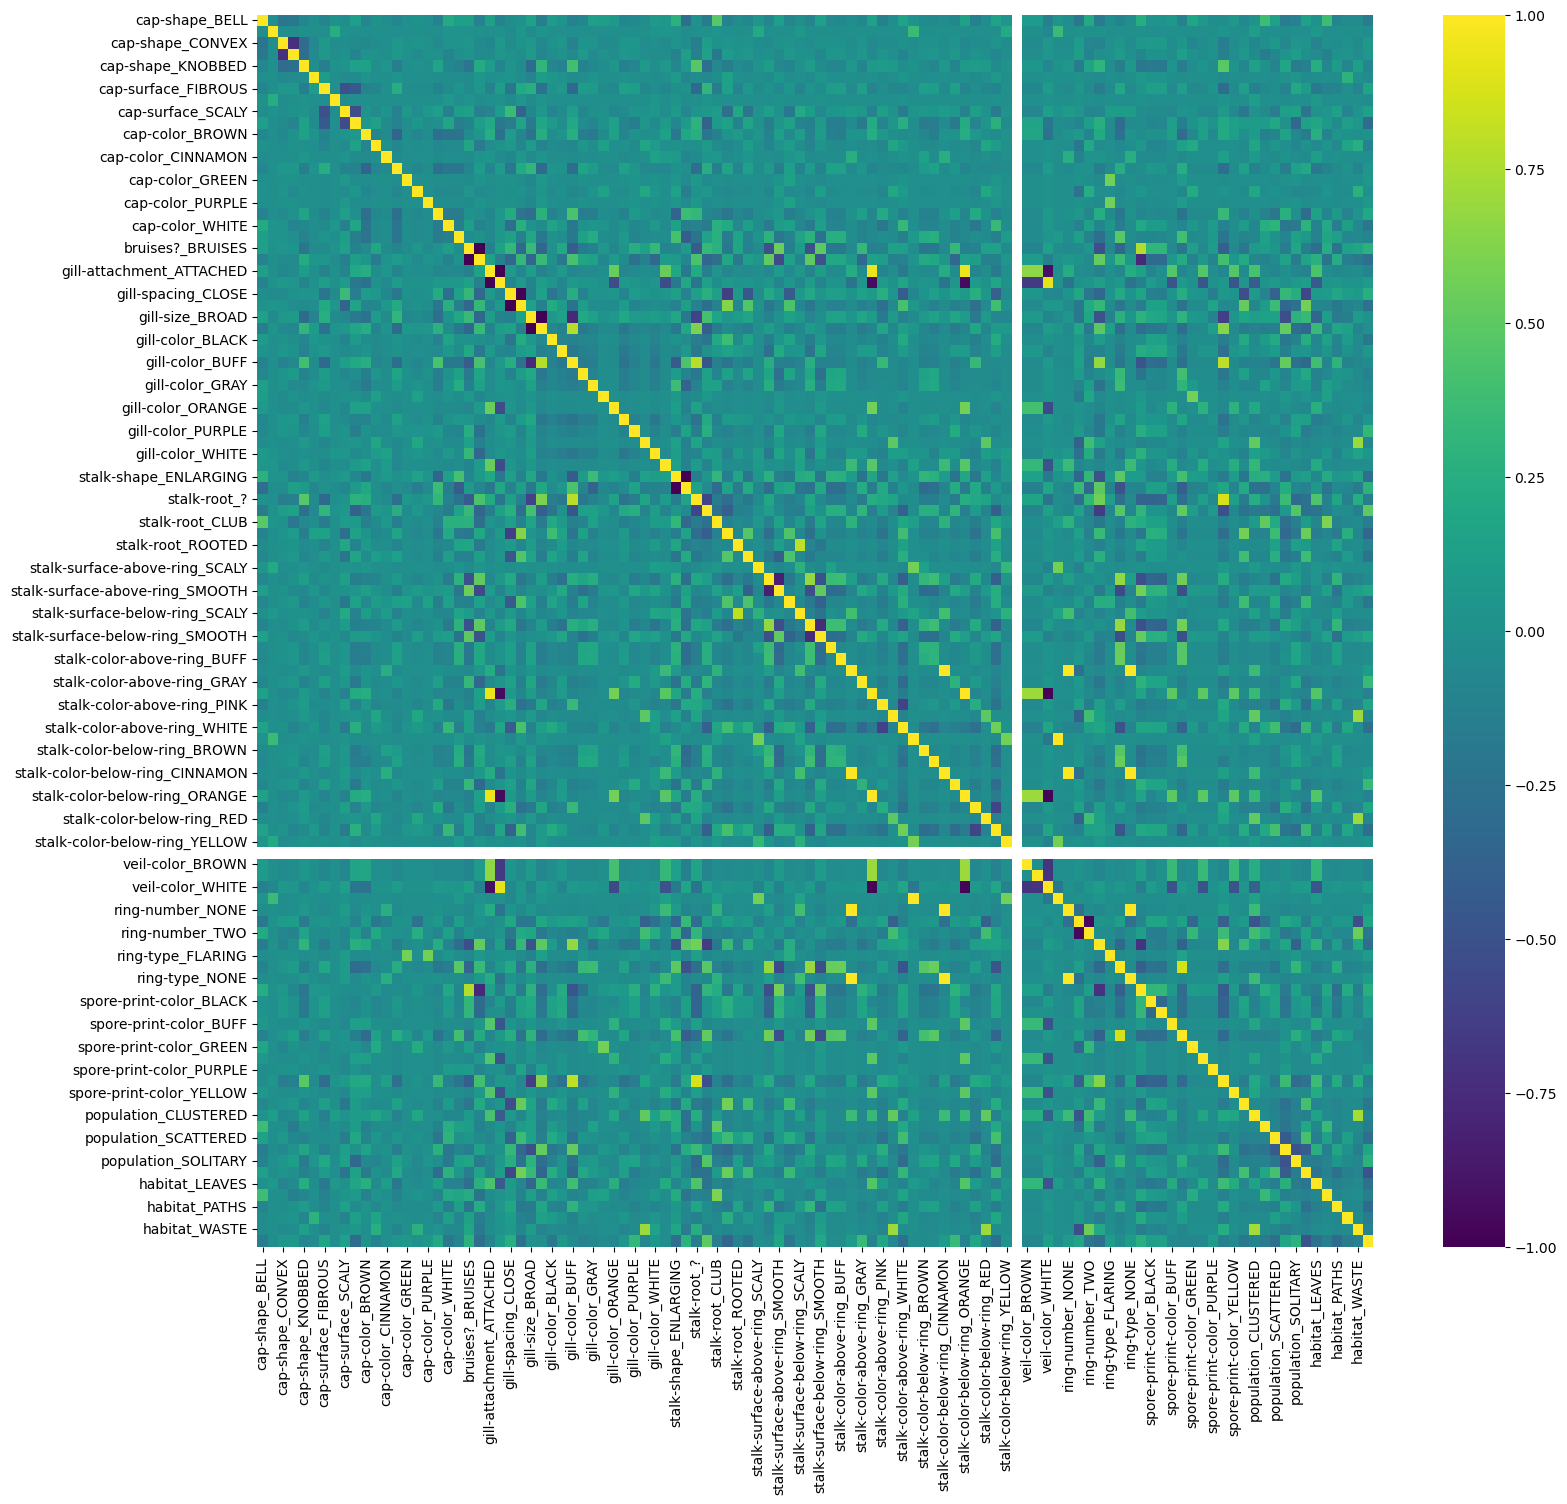

In [30]:
odor_columns = [s for s in df3.columns if "odor" in s]
df4 = df3.drop(columns=odor_columns)

df_corr = df4.drop(columns=['is_edible']).corr()
plt.figure(figsize=(18,16))
sns.heatmap(df_corr,cmap='viridis')

In [31]:
uncorrelated_columns = get_uncorrelated_columns(df4, df_corr, .6)
print(uncorrelated_columns)

0...10...20...30...40...50...60...70...80...90...100...Done!
Starting features 108, Uncorrelated features 75
['cap-shape_BELL', 'cap-shape_CONICAL', 'cap-shape_FLAT', 'cap-shape_KNOBBED', 'cap-shape_SUNKEN', 'cap-surface_FIBROUS', 'cap-surface_GROOVES', 'cap-surface_SCALY', 'cap-surface_SMOOTH', 'cap-color_BROWN', 'cap-color_BUFF', 'cap-color_CINNAMON', 'cap-color_GRAY', 'cap-color_GREEN', 'cap-color_PINK', 'cap-color_PURPLE', 'cap-color_RED', 'cap-color_WHITE', 'cap-color_YELLOW', 'gill-color_BLACK', 'gill-color_BROWN', 'gill-color_CHOCOLATE', 'gill-color_GRAY', 'gill-color_GREEN', 'gill-color_ORANGE', 'gill-color_PINK', 'gill-color_PURPLE', 'gill-color_WHITE', 'gill-color_YELLOW', 'stalk-shape_TAPERING', 'stalk-root_EQUAL', 'stalk-surface-above-ring_FIBROUS', 'stalk-surface-above-ring_SCALY', 'stalk-surface-above-ring_SMOOTH', 'stalk-surface-below-ring_FIBROUS', 'stalk-surface-below-ring_SCALY', 'stalk-surface-below-ring_SMOOTH', 'stalk-color-above-ring_BROWN', 'stalk-color-above-rin

In [32]:
f1 = df4[uncorrelated_columns]
y1 = df4['is_edible']

X1_train, X1_test, y1_train, y1_test = train_test_split(f1,y1, test_size=0.2, random_state=rnd_state)

In [33]:
# Fitting the regressor
regressor_SLR_OLS = sm.OLS(endog = y1_train, exog = X1_train).fit()

# Looking at the summary of regressor
#print(regressor_SLR_OLS.summary())

remaining_features = backwardElimination(regressor=regressor_SLR_OLS,
                                         df_X=X1_train, y=y1_train, min_p_cutoff = 0.05)
print("%d features remaining"%(len(remaining_features)))

Removing unimportant column 'stalk-color-above-ring_BUFF' with P-Value 0.9397
Removing unimportant column 'spore-print-color_GREEN' with P-Value 0.9824
Removing unimportant column 'veil-type_PARTIAL' with P-Value 0.9188
Removing unimportant column 'stalk-color-below-ring_PINK' with P-Value 0.849
Removing unimportant column 'stalk-color-above-ring_BROWN' with P-Value 0.8179
Removing unimportant column 'cap-color_PINK' with P-Value 0.7082
Removing unimportant column 'stalk-color-below-ring_GRAY' with P-Value 0.6428
Removing unimportant column 'stalk-color-above-ring_WHITE' with P-Value 0.4448
Removing unimportant column 'cap-surface_SMOOTH' with P-Value 0.3711
Removing unimportant column 'population_SOLITARY' with P-Value 0.351
Removing unimportant column 'cap-shape_CONICAL' with P-Value 0.1741
Final Max P value is 0.049856. Finished removing features!
64 features remaining


In [34]:
f1 = df4[remaining_features]
y1 = df4['is_edible']

X1_train, X1_test, y1_train, y1_test = train_test_split(f1,y1, test_size=0.2, random_state=rnd_state)

DecisionTreeClassifier Depth testing for is_edible
   max_depth: 1 - Precision score - Test: 0.799252   Train: 0.793114
   max_depth: 2 - Precision score - Test: 0.890871   Train: 0.886963
   max_depth: 3 - Precision score - Test: 0.941368   Train: 0.939829
   max_depth: 4 - Precision score - Test: 0.943574   Train: 0.942129
   max_depth: 5 - Precision score - Test: 0.981582   Train: 0.982592
   max_depth: 6 - Precision score - Test: 0.981602   Train: 0.982625
   max_depth: 7 - Precision score - Test: 1.000000   Train: 0.998880
Best Depth: 7 (of 49 values)- Precision score - Test: 1.000000   Train: 0.998880
KFold results: 0.9971781429535144


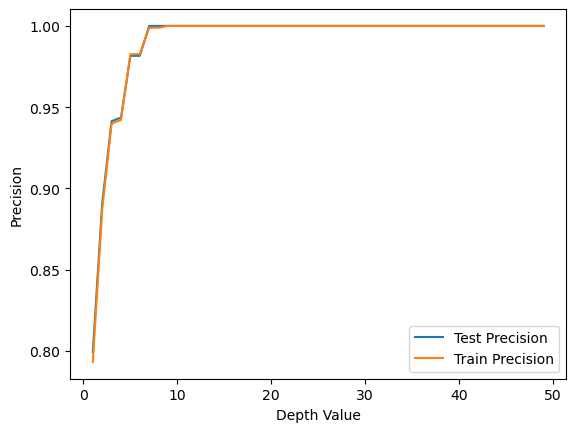

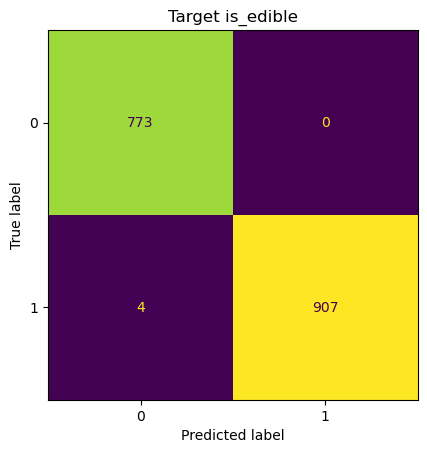

In [35]:
model3 = test_model(X1_train, X1_test, y1_train, y1_test, DecisionTreeClassifier,
                   "max_depth", range(1,50), "DecisionTreeClassifier", "is_edible", "Depth", True)

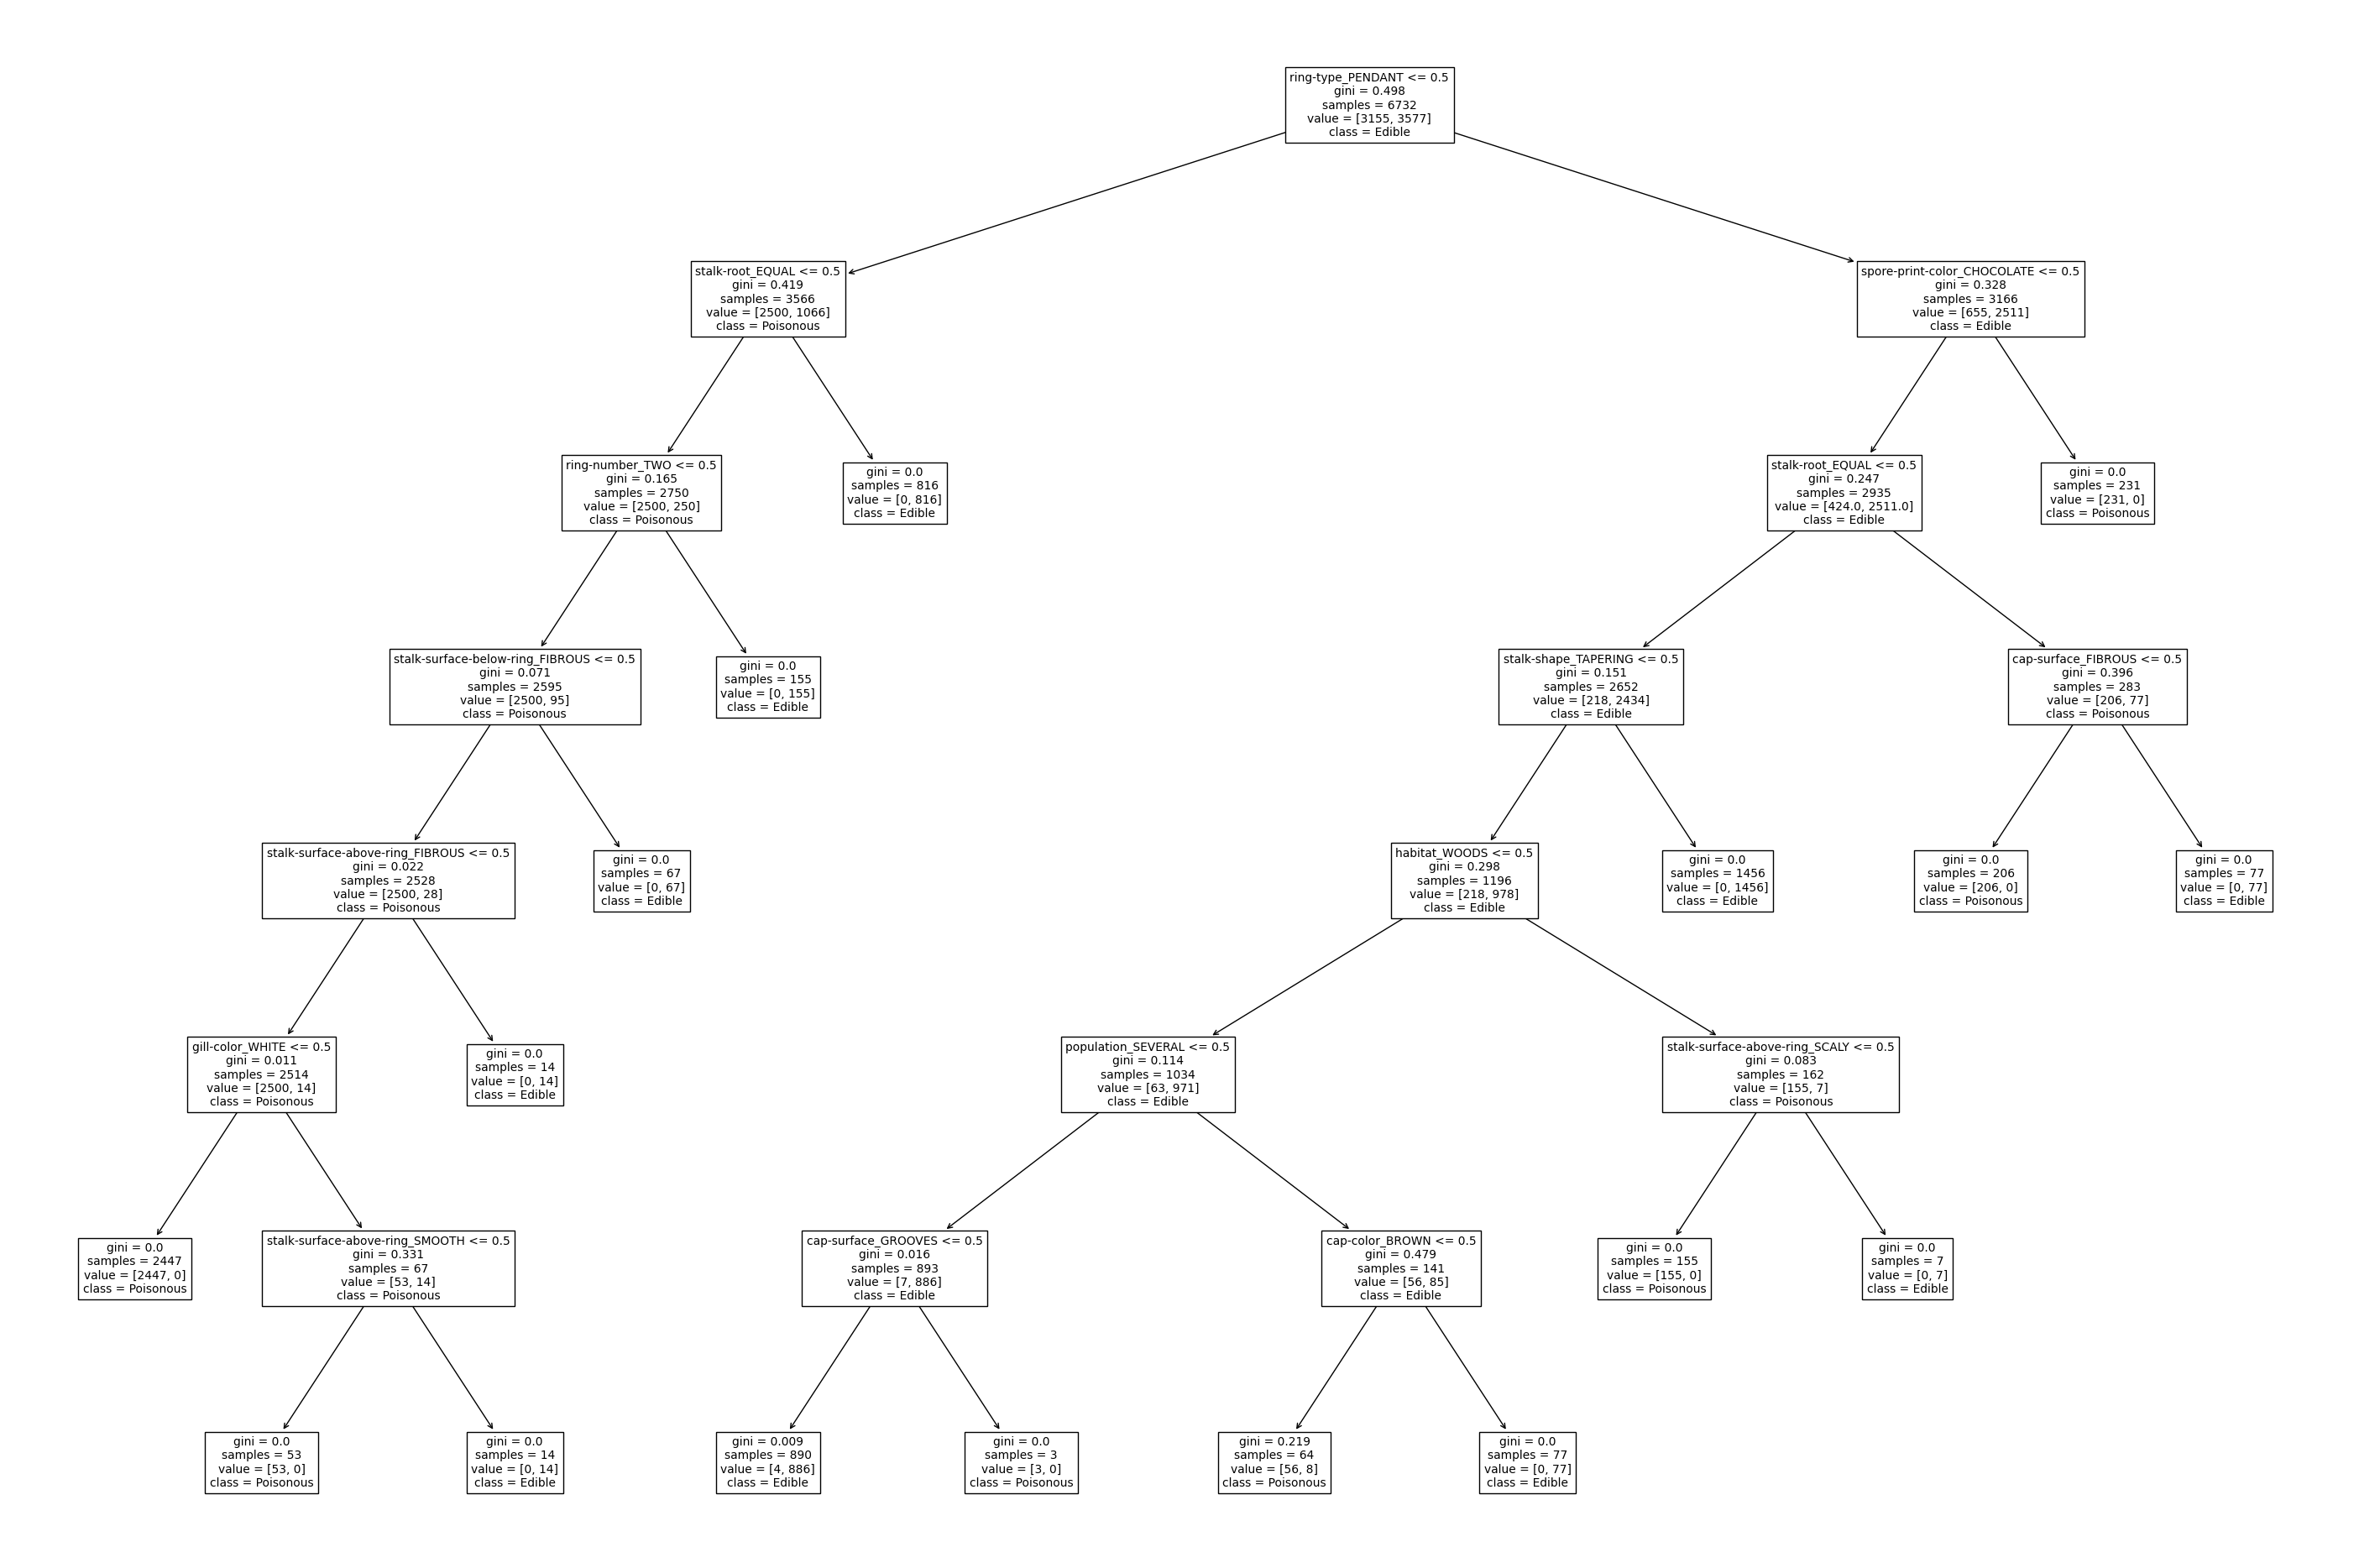

In [36]:
plt.figure(figsize=(36,24))
output = tree.plot_tree(model3, class_names=['Poisonous','Edible'],feature_names=list(df4[remaining_features].columns))

In [37]:
text_representation = tree.export_text(model3, class_names=['Poisonous','Edible'],
                                       feature_names=df4[remaining_features].columns)
print(text_representation)

|--- ring-type_PENDANT <= 0.50
|   |--- stalk-root_EQUAL <= 0.50
|   |   |--- ring-number_TWO <= 0.50
|   |   |   |--- stalk-surface-below-ring_FIBROUS <= 0.50
|   |   |   |   |--- stalk-surface-above-ring_FIBROUS <= 0.50
|   |   |   |   |   |--- gill-color_WHITE <= 0.50
|   |   |   |   |   |   |--- class: Poisonous
|   |   |   |   |   |--- gill-color_WHITE >  0.50
|   |   |   |   |   |   |--- stalk-surface-above-ring_SMOOTH <= 0.50
|   |   |   |   |   |   |   |--- class: Poisonous
|   |   |   |   |   |   |--- stalk-surface-above-ring_SMOOTH >  0.50
|   |   |   |   |   |   |   |--- class: Edible
|   |   |   |   |--- stalk-surface-above-ring_FIBROUS >  0.50
|   |   |   |   |   |--- class: Edible
|   |   |   |--- stalk-surface-below-ring_FIBROUS >  0.50
|   |   |   |   |--- class: Edible
|   |   |--- ring-number_TWO >  0.50
|   |   |   |--- class: Edible
|   |--- stalk-root_EQUAL >  0.50
|   |   |--- class: Edible
|--- ring-type_PENDANT >  0.50
|   |--- spore-print-color_CHOCOLATE <= 0.5

Without using ODOR-related features, we can still identify whether a mushroom is edible or poisonous, with an extremely high (100%) degree of certainty with seven layers of questions.